In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sp1-dataset-customer-service-requests/Customer_Service_Requests_Analysis_Dataset/311-service-requests-nyc/311_Service_Requests_from_2010_to_Present.csv


In [2]:
csr = pd.read_csv("/kaggle/input/sp1-dataset-customer-service-requests/Customer_Service_Requests_Analysis_Dataset/311-service-requests-nyc/311_Service_Requests_from_2010_to_Present.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
csr.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
csr.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
364553,29609918,01/01/2015 12:04:44 AM,01/01/2015 10:22:31 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11421.0,84-25 85 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.695145,-73.860949,"(40.69514470265117, -73.86094888534394)"
364554,29608392,01/01/2015 12:04:28 AM,01/01/2015 02:25:02 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10468.0,2555 SEDGWICK AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.867830,-73.907178,"(40.86782963689454, -73.90717786644662)"
364555,29607589,01/01/2015 12:01:30 AM,01/01/2015 12:20:33 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,508 WEST 139 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.821647,-73.950873,"(40.821646626438095, -73.95087342885292)"
364556,29610889,01/01/2015 12:01:29 AM,01/01/2015 02:42:22 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10466.0,931 EAST 226 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.886361,-73.853290,"(40.88636077906953, -73.85329048666742)"
364557,29611816,01/01/2015 12:00:50 AM,01/01/2015 02:47:50 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11420.0,123-19 135 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.674212,-73.803585,"(40.674211762243935, -73.80358548685278)"


In [5]:
csr.shape

(364558, 53)

In [6]:
type(csr)

pandas.core.frame.DataFrame

In [7]:
csr.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,0.0,0.0,0.0,0.0,0.0,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,NaN,NaN,NaN,NaN,NaN,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,NaN,NaN,NaN,NaN,NaN,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,NaN,NaN,NaN,NaN,NaN,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,NaN,NaN,NaN,NaN,NaN,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,NaN,NaN,NaN,NaN,NaN,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,NaN,NaN,NaN,NaN,NaN,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700715


In [8]:
csr.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [9]:
csr.isna()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364553,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
364554,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
364555,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
364556,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False


In [10]:
csr.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [11]:
import matplotlib.pyplot as plt

(array([35.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 12.]),
 array([     0. ,  36455.8,  72911.6, 109367.4, 145823.2, 182279. ,
        218734.8, 255190.6, 291646.4, 328102.2, 364558. ]),
 <BarContainer object of 10 artists>)

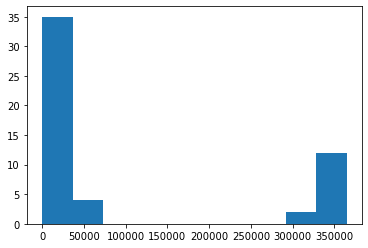

In [12]:
plt.hist(csr.isna().sum())

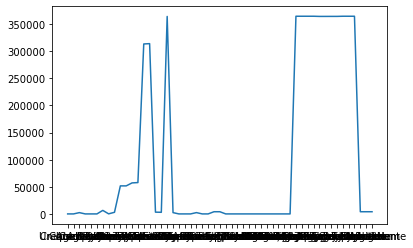

In [13]:
plt.plot(csr.isna().sum())

In [14]:
plt.show()

In [15]:
csr_null = csr.isna().sum()
print(type(csr_null))
print(type(csr.columns))
print(csr_null.index)

<class 'pandas.core.series.Series'>
<class 'pandas.core.indexes.base.Index'>
Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Directi

<BarContainer object of 53 artists>

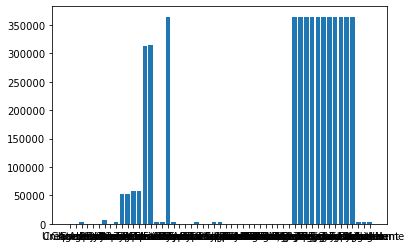

In [16]:
plt.bar(csr_null.index,csr_null)

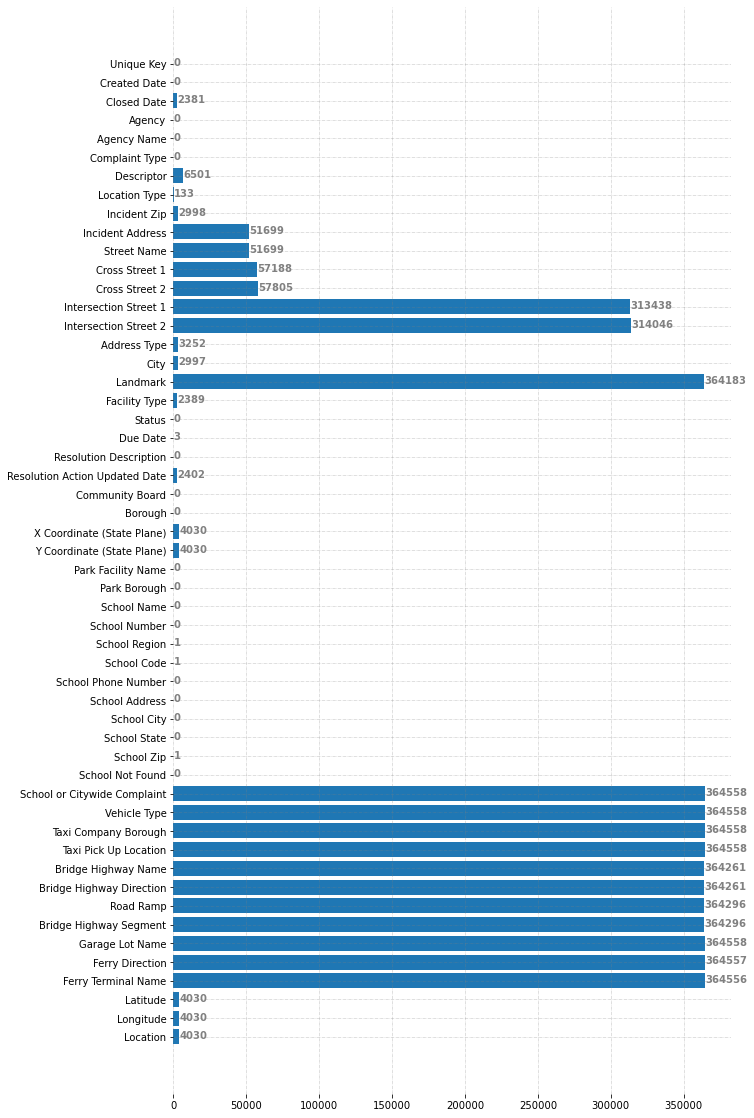

In [17]:
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(csr_null.index,csr_null)
ax.grid(visible = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.5)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

#ax.xaxis.set_ticks_position('none')
#ax.yaxis.set_ticks_position('none')

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

plt.show()

In [18]:
#csr['Closed Date'].isnull().sum()
csr_cdate_null = csr['Closed Date'].isnull()
print(csr_cdate_null[csr_cdate_null==True].index)

csr_1 = csr.drop(csr_cdate_null[csr_cdate_null==True].index)

print(csr.shape, csr_1.shape)

Int64Index([   416,    611,   1648,   1816,   1965,   1987,   2149,   2415,
              2541,   2556,
            ...
            362939, 362943, 363376, 363378, 363614, 363643, 363789, 363805,
            364151, 364349],
           dtype='int64', length=2381)
(364558, 53) (362177, 53)


In [19]:
csr.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [20]:
csr_1['Created Date']

0         12/31/2015 11:59:45 PM
1         12/31/2015 11:59:44 PM
2         12/31/2015 11:59:29 PM
3         12/31/2015 11:57:46 PM
4         12/31/2015 11:56:58 PM
                   ...          
364553    01/01/2015 12:04:44 AM
364554    01/01/2015 12:04:28 AM
364555    01/01/2015 12:01:30 AM
364556    01/01/2015 12:01:29 AM
364557    01/01/2015 12:00:50 AM
Name: Created Date, Length: 362177, dtype: object

In [21]:
#print(csr_1['Closed Date'].dtype)
#print(type(csr_1['Closed Date']))
#print(pd.to_datetime(csr_1[0,'Closed Date']))
#print(csr_1.iloc[0]['Created Date'],'\n',pd.to_datetime(csr_1.iloc[0]['Created Date']))
#print('Ok')
#print(csr_1['Closed Date'])

time_elapsed = pd.to_datetime(csr_1['Closed Date']) - pd.to_datetime(csr_1['Created Date'])
print(time_elapsed)
print(type(time_elapsed))
print(time_elapsed.dtype)


0        0 days 00:55:30
1        0 days 01:27:13
2        0 days 04:51:34
3        0 days 07:45:27
4        0 days 03:27:44
               ...      
364553   0 days 10:17:47
364554   0 days 02:20:34
364555   0 days 00:19:03
364556   0 days 02:40:53
364557   0 days 02:47:00
Length: 362177, dtype: timedelta64[ns]
<class 'pandas.core.series.Series'>
timedelta64[ns]


In [22]:
csr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

In [23]:
csr_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362177 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      362177 non-null  int64  
 1   Created Date                    362177 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          362177 non-null  object 
 4   Agency Name                     362177 non-null  object 
 5   Complaint Type                  362177 non-null  object 
 6   Descriptor                      355681 non-null  object 
 7   Location Type                   362047 non-null  object 
 8   Incident Zip                    361502 non-null  float64
 9   Incident Address                310491 non-null  object 
 10  Street Name                     310491 non-null  object 
 11  Cross Street 1                  306846 non-null  object 
 12  Cross Street 2  

In [24]:
closed_date = pd.to_datetime(csr_1['Closed Date'],errors='coerce')
closed_date

0        2016-01-01 00:55:15
1        2016-01-01 01:26:57
2        2016-01-01 04:51:03
3        2016-01-01 07:43:13
4        2016-01-01 03:24:42
                 ...        
364553   2015-01-01 10:22:31
364554   2015-01-01 02:25:02
364555   2015-01-01 00:20:33
364556   2015-01-01 02:42:22
364557   2015-01-01 02:47:50
Name: Closed Date, Length: 362177, dtype: datetime64[ns]

In [25]:
created_date = pd.to_datetime(csr_1['Created Date'],errors='coerce')
created_date

0        2015-12-31 23:59:45
1        2015-12-31 23:59:44
2        2015-12-31 23:59:29
3        2015-12-31 23:57:46
4        2015-12-31 23:56:58
                 ...        
364553   2015-01-01 00:04:44
364554   2015-01-01 00:04:28
364555   2015-01-01 00:01:30
364556   2015-01-01 00:01:29
364557   2015-01-01 00:00:50
Name: Created Date, Length: 362177, dtype: datetime64[ns]

In [26]:
closed_date[closed_date == 'NaT']
#this might not be correct

#closed_date.np.isnat().sum() --- this is wrong

Series([], Name: Closed Date, dtype: datetime64[ns])

In [27]:
#created_date[created_date == 'NaT']
print(np.isnat(created_date).sum(), np.isnat(closed_date).sum())

0 0


In [28]:
time_elapsed = closed_date - created_date
time_elapsed

0        0 days 00:55:30
1        0 days 01:27:13
2        0 days 04:51:34
3        0 days 07:45:27
4        0 days 03:27:44
               ...      
364553   0 days 10:17:47
364554   0 days 02:20:34
364555   0 days 00:19:03
364556   0 days 02:40:53
364557   0 days 02:47:00
Length: 362177, dtype: timedelta64[ns]

In [29]:
time_elapsed[time_elapsed.dt.total_seconds() < 0]

Series([], dtype: timedelta64[ns])

In [30]:
time_elapsed = time_elapsed.dt.total_seconds()

In [31]:
time_elapsed

0          3330.0
1          5233.0
2         17494.0
3         27927.0
4         12464.0
           ...   
364553    37067.0
364554     8434.0
364555     1143.0
364556     9653.0
364557    10020.0
Length: 362177, dtype: float64

In [32]:
time_elapsed.describe()

count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
dtype: float64

In [33]:
csr_1['Complaint Type'].isna().sum()

0

In [34]:
#csr_1['City'].isna().sum()
pd.isna(csr_1['City']).sum()

#both are correct

674

In [35]:
csr_1[csr_1['City'].isna()]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
33,32306700,12/31/2015 11:18:10 PM,01/02/2016 01:04:03 AM,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,NaN,25-0-25-54 12TH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,32309451,12/31/2015 05:40:16 PM,01/01/2016 10:59:11 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,NaN,72-23-72-2 72ND PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,32309860,12/31/2015 05:05:30 PM,01/01/2016 08:17:35 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,NaN,9-15-9-99 CORNAGA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1421,32299438,12/30/2015 11:55:25 AM,12/30/2015 02:35:54 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,NaN,101 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2131,32294310,12/29/2015 02:53:28 PM,12/29/2015 05:46:06 PM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,NaN,3300-3398 37TH AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361851,29633795,01/04/2015 11:19:28 PM,01/05/2015 10:13:06 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,25-40-25-4 48TH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361912,29632589,01/04/2015 09:20:56 PM,01/05/2015 01:46:10 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,NaN,47-22-47-9 216TH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361975,29633040,01/04/2015 08:04:21 PM,01/05/2015 01:07:15 PM,NYPD,New York City Police Department,Noise - Commercial,Car/Truck Horn,Store/Commercial,NaN,58-28-58-9 99TH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362048,29633311,01/04/2015 06:21:17 PM,01/06/2015 08:26:39 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,NaN,26000-2609 79TH AVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
csr_1['City'].fillna('Unknown City',inplace=True)

In [37]:
csr_1[csr_1['City'].isna()]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location


(array([257741.,  16180.,  13762.,  37085.,  10873.,  13336.,   6433.,
          4733.,    725.,   1309.]),
 array([ 0. ,  5.3, 10.6, 15.9, 21.2, 26.5, 31.8, 37.1, 42.4, 47.7, 53. ]),
 <BarContainer object of 10 artists>)

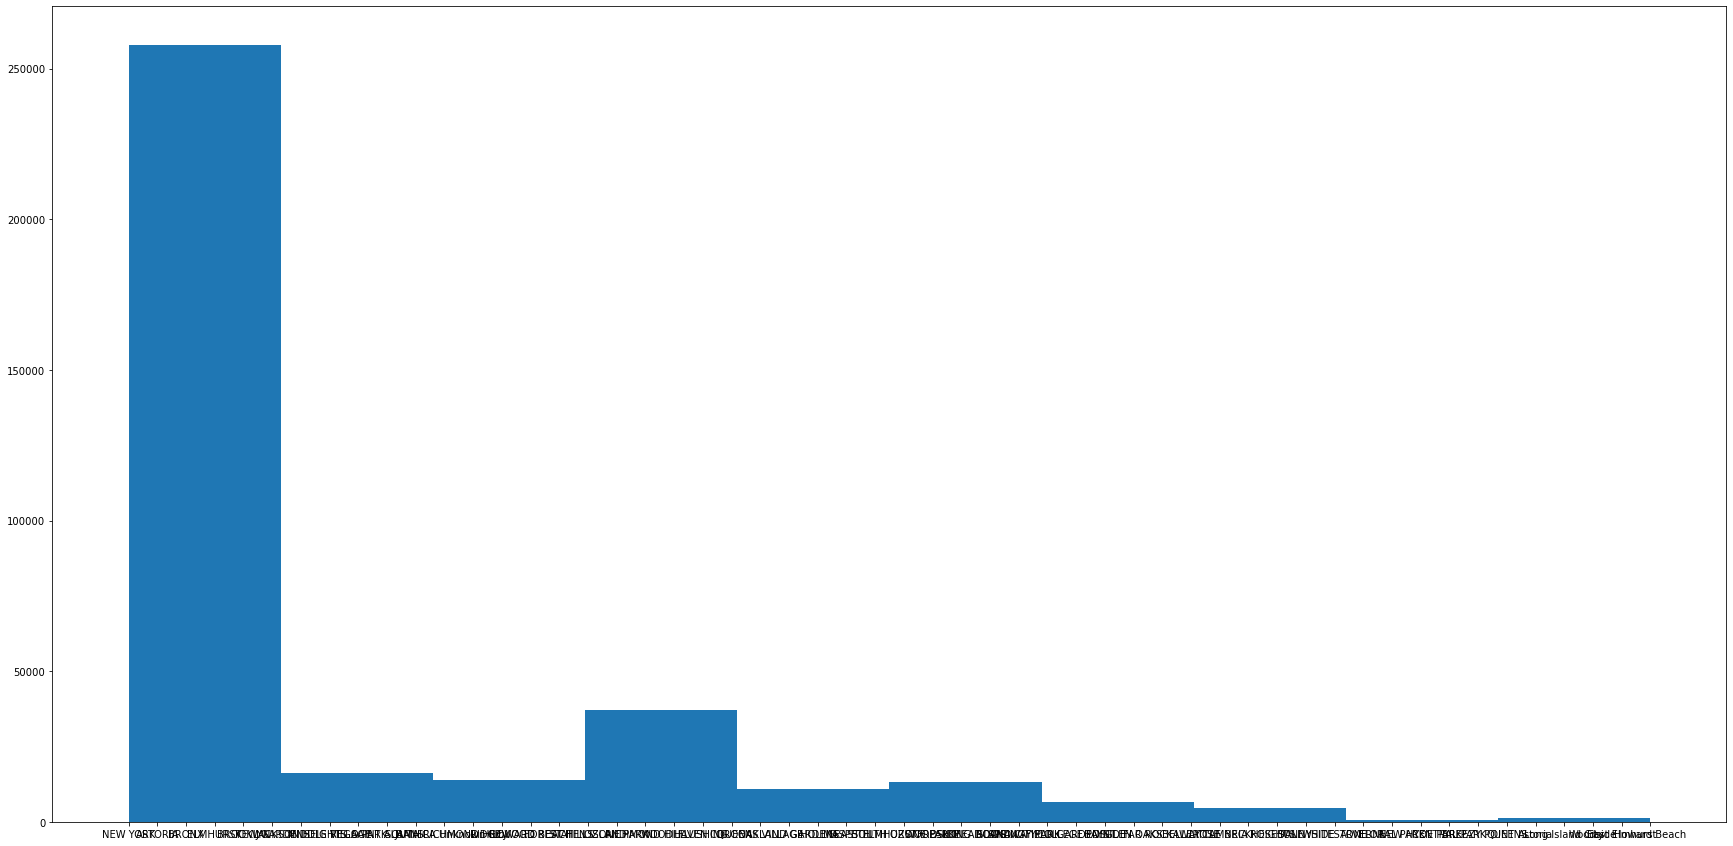

In [38]:
fig = plt.figure(figsize=(30,15))
plt.hist(csr_1['City'])


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

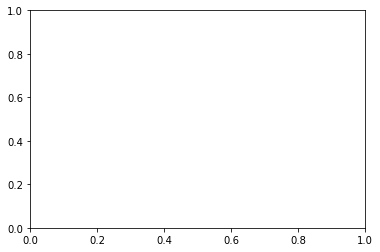

In [39]:
plt.xticks()

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt


<AxesSubplot:xlabel='City', ylabel='Count'>

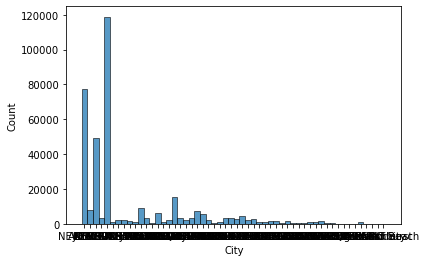

In [41]:
sns.histplot(csr_1['City'])

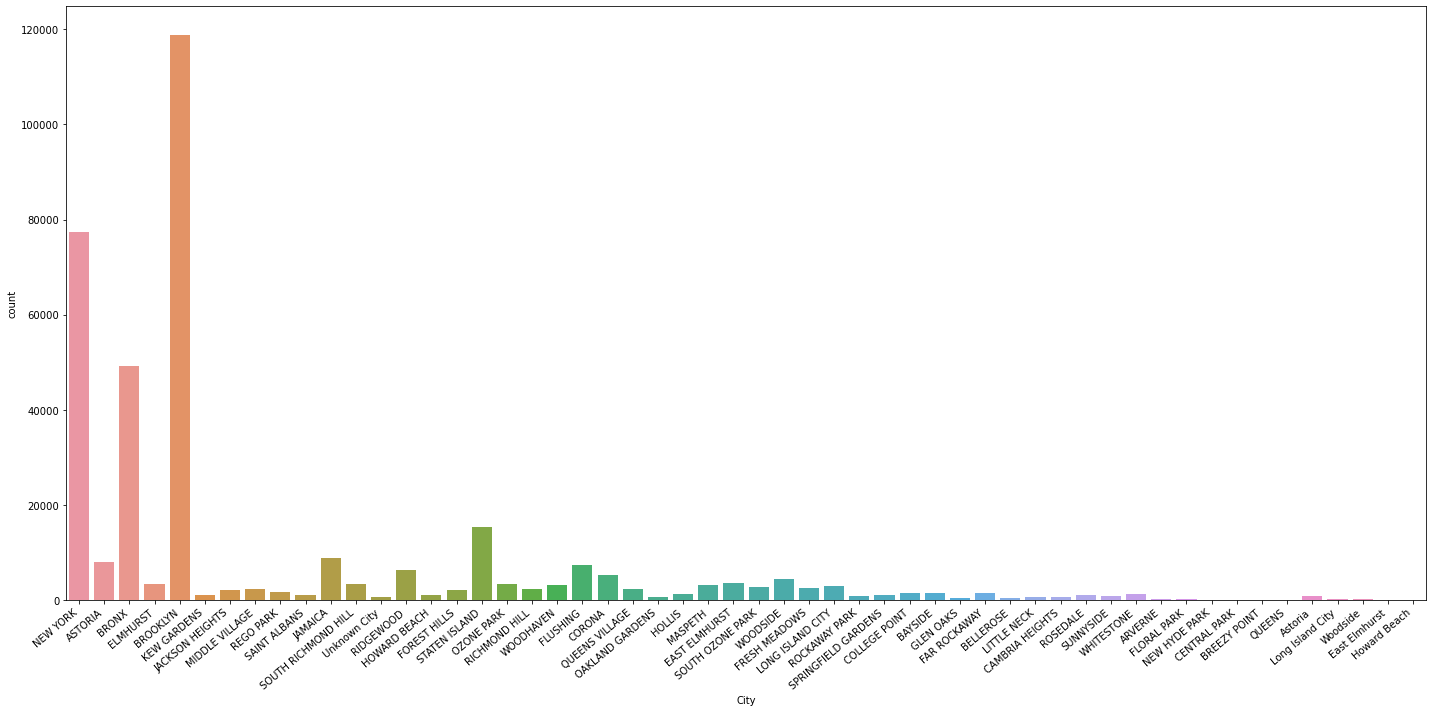

In [42]:
plt.figure(figsize=(20,10))
# ax = sns.histplot(csr_1['City'])
ax = sns.countplot(x="City",data=csr_1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
plt.tight_layout()
plt.show()

In [43]:
pd.set_option('display.max_columns',60)
csr_1[csr_1['City']=='BROOKLYN']

# ax_s = sns.scatterplot(x=)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
5,32306554,12/31/2015 11:56:30 PM,01/01/2016 01:50:11 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,260 21 STREET,21 STREET,5 AVENUE,6 AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,01/01/2016 07:56:30 AM,The Police Department responded and upon arriv...,01/01/2016 01:50:11 AM,07 BROOKLYN,BROOKLYN,986312.0,180032.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)"
9,32308391,12/31/2015 11:53:58 PM,01/01/2016 01:17:40 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,1408 66 STREET,66 STREET,14 AVENUE,NEW UTRECHT AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,01/01/2016 07:53:58 AM,The Police Department responded and upon arriv...,01/01/2016 01:17:40 AM,11 BROOKLYN,BROOKLYN,984378.0,166541.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)"
13,32305074,12/31/2015 11:47:58 PM,01/01/2016 08:18:47 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11208.0,38 COX PLACE,COX PLACE,CRESCENT STREET,DEAD END,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,01/01/2016 07:47:58 AM,The Police Department responded to the complai...,01/01/2016 08:18:47 AM,05 BROOKLYN,BROOKLYN,1019054.0,189780.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.687511,-73.874505,"(40.68751060232221, -73.87450451131276)"
17,32310273,12/31/2015 11:44:52 PM,01/01/2016 12:36:10 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11217.0,622 DEGRAW STREET,DEGRAW STREET,3 AVENUE,4 AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,01/01/2016 07:44:52 AM,The Police Department responded to the complai...,01/01/2016 12:36:10 AM,06 BROOKLYN,BROOKLYN,988846.0,186711.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.679154,-73.983430,"(40.679154133157326, -73.98342992763081)"
18,32306617,12/31/2015 11:40:59 PM,01/01/2016 02:37:28 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11234.0,2192 FLATBUSH AVENUE,FLATBUSH AVENUE,EAST 46 STREET,AVENUE O,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,01/01/2016 07:40:59 AM,The Police Department responded to the complai...,01/01/2016 02:37:28 AM,18 BROOKLYN,BROOKLYN,1003628.0,163910.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.616550,-73.930202,"(40.61655032892211, -73.93020153359745)"
...,...,...,...,...,...,...,...,...,...,...

<AxesSubplot:title={'center':'Compaints in Brooklyn'}>

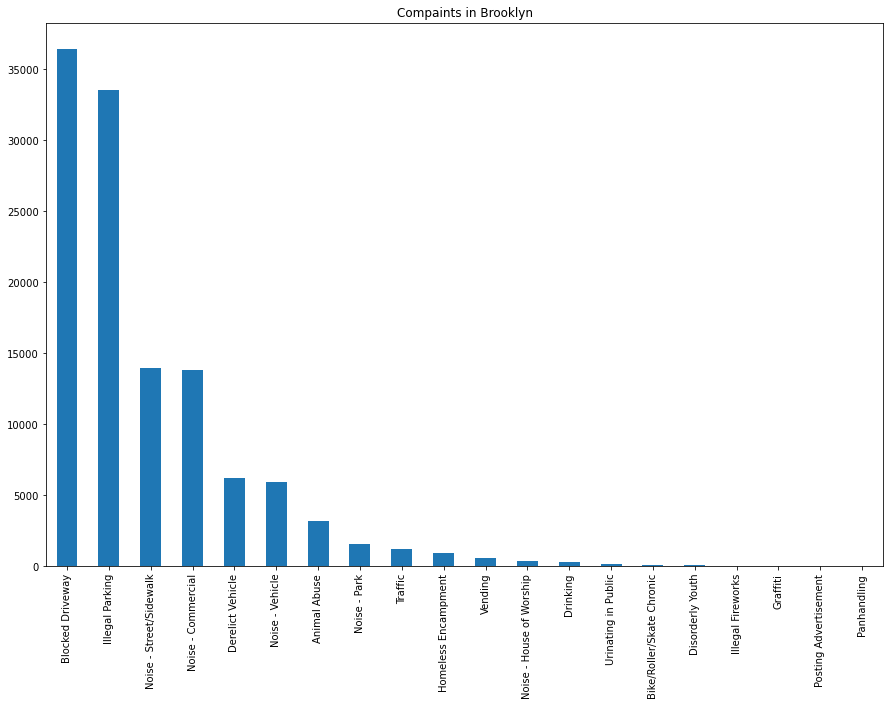

In [44]:
csr_1[csr_1['City']=='BROOKLYN']['Complaint Type'].value_counts().plot(kind='bar',figsize=(15,10),title='Compaints in Brooklyn')

In [45]:
csr_brooklyn = csr_1[csr_1['City']=='BROOKLYN']

Text(0.5, 1.0, 'Complaints map of Brooklyn')

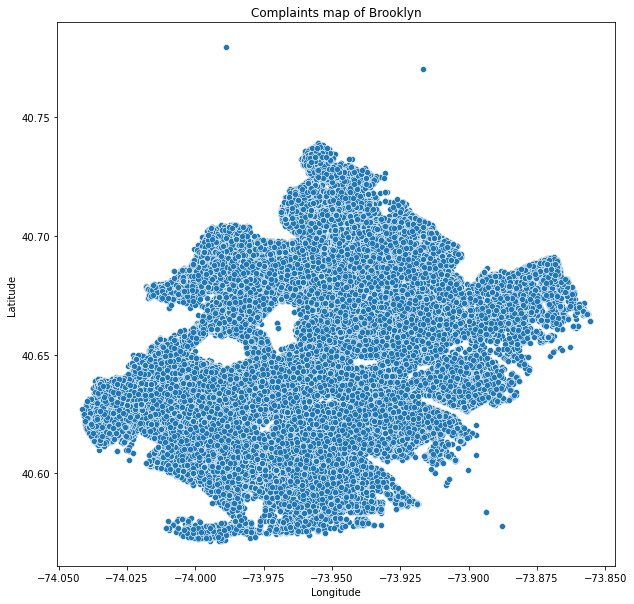

In [46]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=csr_brooklyn['Longitude'],y=csr_brooklyn['Latitude'])
plt.title("Complaints map of Brooklyn")

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

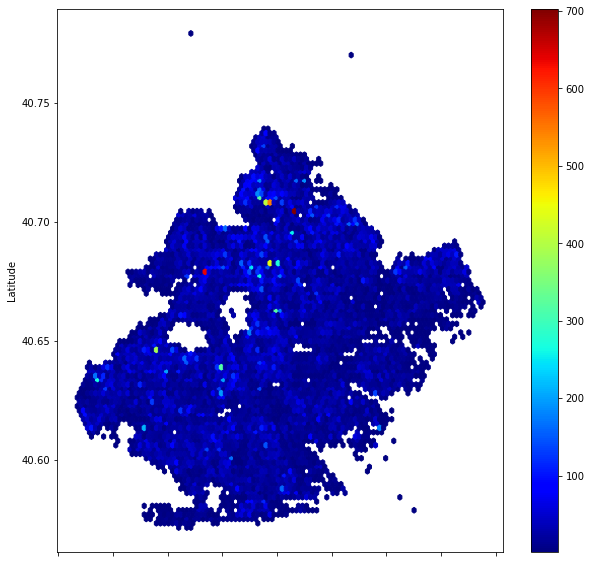

In [47]:
csr_brooklyn.plot(kind='hexbin',x='Longitude',y='Latitude',colormap='jet',mincnt=1,figsize=(10,10))

Task 3

3.1 Plot a bar graph to show the types of complaints

<AxesSubplot:>

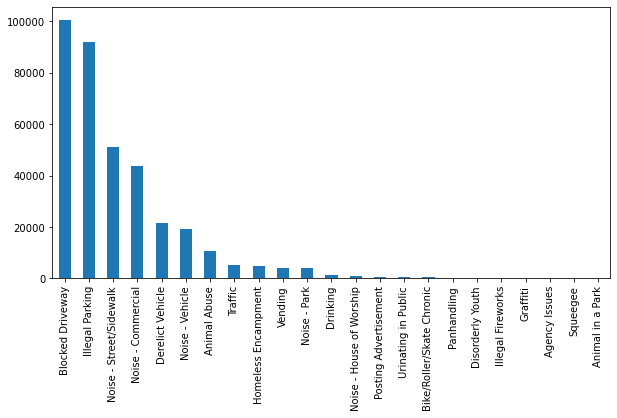

In [48]:
csr_1['Complaint Type'].value_counts().plot(kind='bar',figsize=(10,5))

3.2 Check the frequency of various types of complaints for New
York City

In [49]:
csr_ny=csr_1[csr_1['City']=='NEW YORK']
csr_ny['Complaint Type'].value_counts()

Noise - Street/Sidewalk      22245
Noise - Commercial           18686
Illegal Parking              14549
Noise - Vehicle               6294
Homeless Encampment           3060
Blocked Driveway              2705
Vending                       2638
Animal Abuse                  1941
Traffic                       1769
Noise - Park                  1243
Derelict Vehicle               695
Drinking                       321
Urinating in Public            264
Bike/Roller/Skate Chronic      254
Noise - House of Worship       222
Panhandling                    206
Disorderly Youth                81
Posting Advertisement           49
Illegal Fireworks               38
Graffiti                        25
Squeegee                         4
Name: Complaint Type, dtype: int64

<AxesSubplot:>

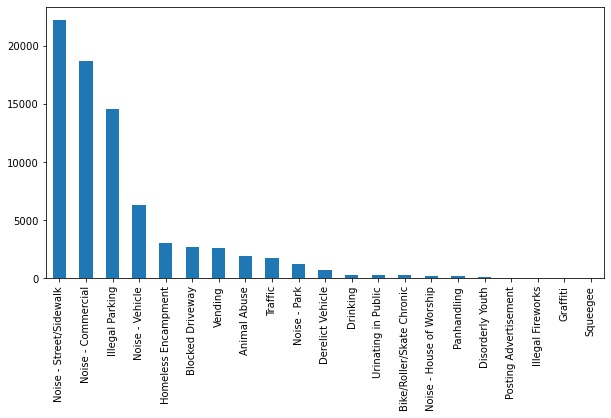

In [50]:
csr_ny['Complaint Type'].value_counts().plot(kind='bar',figsize=(10,5))

In [51]:
pd.set_option('display.max_rows',100)
print(csr_1.groupby(by=['Borough','City'])['Unique Key'].count())

Borough        City               
BRONX          BRONX                   49162
               STATEN ISLAND               2
BROOKLYN       BROOKLYN               118846
               MASPETH                     2
               NEW YORK                    1
               QUEENS VILLAGE              1
               SOUTH OZONE PARK            1
MANHATTAN      BRONX                       4
               BROOKLYN                    1
               CENTRAL PARK              110
               JAMAICA                     2
               NEW YORK                77285
               Unknown City               37
QUEENS         ARVERNE                   259
               ASTORIA                  7991
               Astoria                   905
               BAYSIDE                  1550
               BELLEROSE                 487
               BREEZY POINT               31
               BROOKLYN                    2
               CAMBRIA HEIGHTS           617
               COLLE

<AxesSubplot:xlabel='Borough', ylabel='City'>

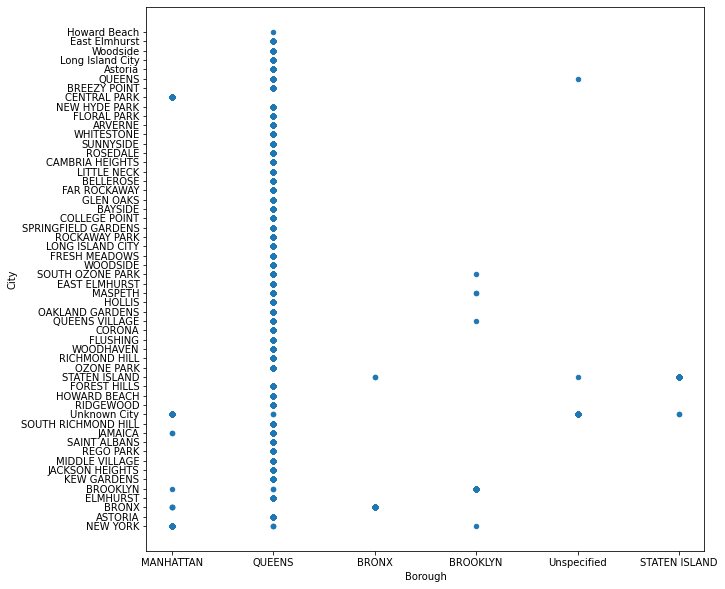

In [52]:
csr_1.plot(kind='scatter',y='City',x='Borough',figsize=(10,10))

3.3 Find the top 10 complaint types

In [53]:
csr_ny['Complaint Type'].value_counts().head(10)

Noise - Street/Sidewalk    22245
Noise - Commercial         18686
Illegal Parking            14549
Noise - Vehicle             6294
Homeless Encampment         3060
Blocked Driveway            2705
Vending                     2638
Animal Abuse                1941
Traffic                     1769
Noise - Park                1243
Name: Complaint Type, dtype: int64

3.4 Display the various types of complaints in each city

In [54]:
csr_group = csr_1.groupby(['City','Complaint Type'])['Unique Key'].count()
print(csr_group)
print(csr_group[('ARVERNE','Animal Abuse')])
# csr_group[("NEW HYDE PARK", "Noise - Street/Sidewalk")]
csr_group_df = pd.DataFrame({'count':csr_1.groupby(['City','Complaint Type'])['Unique Key'].size()}).reset_index()
print(csr_group_df)

City      Complaint Type         
ARVERNE   Animal Abuse                46
          Blocked Driveway            50
          Derelict Vehicle            32
          Disorderly Youth             2
          Drinking                     1
                                    ... 
Woodside  Blocked Driveway            27
          Derelict Vehicle             8
          Illegal Parking            124
          Noise - Commercial           2
          Noise - Street/Sidewalk      5
Name: Unique Key, Length: 792, dtype: int64
46
         City           Complaint Type  count
0     ARVERNE             Animal Abuse     46
1     ARVERNE         Blocked Driveway     50
2     ARVERNE         Derelict Vehicle     32
3     ARVERNE         Disorderly Youth      2
4     ARVERNE                 Drinking      1
..        ...                      ...    ...
787  Woodside         Blocked Driveway     27
788  Woodside         Derelict Vehicle      8
789  Woodside          Illegal Parking    124
790  Woo

In [55]:
a = csr_group_df[(csr_group_df['City']=='NEW HYDE PARK') & (csr_group_df['Complaint Type']=='Noise - Street/Sidewalk')]
print(type(a))
print(a)
print(a.shape)
# print(a.iat[0])
not(a.empty)

<class 'pandas.core.frame.DataFrame'>
Empty DataFrame
Columns: [City, Complaint Type, count]
Index: []
(0, 3)


False

In [56]:
type(csr_group_df['count'])

pandas.core.series.Series

3.5 Create a DataFrame, df_new, which contains cities as columns and complaint types in rows

In [57]:
df_new = pd.DataFrame(columns=csr_1['City'].unique())

In [58]:
df_new

,NEW YORK,ASTORIA,BRONX,ELMHURST,BROOKLYN,KEW GARDENS,JACKSON HEIGHTS,MIDDLE VILLAGE,REGO PARK,SAINT ALBANS,JAMAICA,SOUTH RICHMOND HILL,Unknown City,RIDGEWOOD,HOWARD BEACH,FOREST HILLS,STATEN ISLAND,OZONE PARK,RICHMOND HILL,WOODHAVEN,FLUSHING,CORONA,QUEENS VILLAGE,OAKLAND GARDENS,HOLLIS,MASPETH,EAST ELMHURST,SOUTH OZONE PARK,WOODSIDE,FRESH MEADOWS,LONG ISLAND CITY,ROCKAWAY PARK,SPRINGFIELD GARDENS,COLLEGE POINT,BAYSIDE,GLEN OAKS,FAR ROCKAWAY,BELLEROSE,LITTLE NECK,CAMBRIA HEIGHTS,ROSEDALE,SUNNYSIDE,WHITESTONE,ARVERNE,FLORAL PARK,NEW HYDE PARK,CENTRAL PARK,BREEZY POINT,QUEENS,Astoria,Long Island City,Woodside,East Elmhurst,Howard Beach


In [59]:
rows = csr_1['Complaint Type'].unique()
print(rows)
print(rows.shape)
print(type(rows))

['Noise - Street/Sidewalk' 'Blocked Driveway' 'Illegal Parking'
 'Derelict Vehicle' 'Noise - Commercial' 'Noise - House of Worship'
 'Posting Advertisement' 'Noise - Vehicle' 'Animal Abuse' 'Vending'
 'Traffic' 'Drinking' 'Bike/Roller/Skate Chronic' 'Panhandling'
 'Noise - Park' 'Homeless Encampment' 'Urinating in Public' 'Graffiti'
 'Disorderly Youth' 'Illegal Fireworks' 'Agency Issues' 'Squeegee'
 'Animal in a Park']
(23,)
<class 'numpy.ndarray'>


In [60]:
new = pd.DataFrame(index=rows,columns=csr_1['City'].unique())
new

,NEW YORK,ASTORIA,BRONX,ELMHURST,BROOKLYN,KEW GARDENS,JACKSON HEIGHTS,MIDDLE VILLAGE,REGO PARK,SAINT ALBANS,JAMAICA,SOUTH RICHMOND HILL,Unknown City,RIDGEWOOD,HOWARD BEACH,FOREST HILLS,STATEN ISLAND,OZONE PARK,RICHMOND HILL,WOODHAVEN,FLUSHING,CORONA,QUEENS VILLAGE,OAKLAND GARDENS,HOLLIS,MASPETH,EAST ELMHURST,SOUTH OZONE PARK,WOODSIDE,FRESH MEADOWS,LONG ISLAND CITY,ROCKAWAY PARK,SPRINGFIELD GARDENS,COLLEGE POINT,BAYSIDE,GLEN OAKS,FAR ROCKAWAY,BELLEROSE,LITTLE NECK,CAMBRIA HEIGHTS,ROSEDALE,SUNNYSIDE,WHITESTONE,ARVERNE,FLORAL PARK,NEW HYDE PARK,CENTRAL PARK,BREEZY POINT,QUEENS,Astoria,Long Island City,Woodside,East Elmhurst,Howard Beach
Noise - Street/Sidewalk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blocked Driveway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Illegal Parking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Derelict Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Noise - Commercial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Noise - House of Worship,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Posting Advertisement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Noise - Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Animal Abuse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vending,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
new_copy = new.copy()
new_copy

,NEW YORK,ASTORIA,BRONX,ELMHURST,BROOKLYN,KEW GARDENS,JACKSON HEIGHTS,MIDDLE VILLAGE,REGO PARK,SAINT ALBANS,JAMAICA,SOUTH RICHMOND HILL,Unknown City,RIDGEWOOD,HOWARD BEACH,FOREST HILLS,STATEN ISLAND,OZONE PARK,RICHMOND HILL,WOODHAVEN,FLUSHING,CORONA,QUEENS VILLAGE,OAKLAND GARDENS,HOLLIS,MASPETH,EAST ELMHURST,SOUTH OZONE PARK,WOODSIDE,FRESH MEADOWS,LONG ISLAND CITY,ROCKAWAY PARK,SPRINGFIELD GARDENS,COLLEGE POINT,BAYSIDE,GLEN OAKS,FAR ROCKAWAY,BELLEROSE,LITTLE NECK,CAMBRIA HEIGHTS,ROSEDALE,SUNNYSIDE,WHITESTONE,ARVERNE,FLORAL PARK,NEW HYDE PARK,CENTRAL PARK,BREEZY POINT,QUEENS,Astoria,Long Island City,Woodside,East Elmhurst,Howard Beach
Noise - Street/Sidewalk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blocked Driveway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Illegal Parking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Derelict Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Noise - Commercial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Noise - House of Worship,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Posting Advertisement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Noise - Vehicle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Animal Abuse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vending,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
csr_group_df.columns

Index(['City', 'Complaint Type', 'count'], dtype='object')

In [63]:

new_copy = new.copy()
for rowIndex,row in new.iterrows():
    for columnIndex,value in row.items():
        #print(rowIndex,columnIndex,value)
        #if columnIndex in csr_group_df.columns and rowIndex in csr_group_df.rows:
        temp = csr_group_df[(csr_group_df['City']==columnIndex) & (csr_group_df['Complaint Type']==rowIndex)]['count']
        if (not(temp.empty)): 
            new_copy.loc[rowIndex][columnIndex] = temp.iat[0]
        else: 
            new_copy.loc[rowIndex][columnIndex] = 0
            #print(type(temp))
            #print(type(temp['count']))
            #print(new_copy.loc[rowIndex][columnIndex])

In [64]:
new_copy

,NEW YORK,ASTORIA,BRONX,ELMHURST,BROOKLYN,KEW GARDENS,JACKSON HEIGHTS,MIDDLE VILLAGE,REGO PARK,SAINT ALBANS,JAMAICA,SOUTH RICHMOND HILL,Unknown City,RIDGEWOOD,HOWARD BEACH,FOREST HILLS,STATEN ISLAND,OZONE PARK,RICHMOND HILL,WOODHAVEN,FLUSHING,CORONA,QUEENS VILLAGE,OAKLAND GARDENS,HOLLIS,MASPETH,EAST ELMHURST,SOUTH OZONE PARK,WOODSIDE,FRESH MEADOWS,LONG ISLAND CITY,ROCKAWAY PARK,SPRINGFIELD GARDENS,COLLEGE POINT,BAYSIDE,GLEN OAKS,FAR ROCKAWAY,BELLEROSE,LITTLE NECK,CAMBRIA HEIGHTS,ROSEDALE,SUNNYSIDE,WHITESTONE,ARVERNE,FLORAL PARK,NEW HYDE PARK,CENTRAL PARK,BREEZY POINT,QUEENS,Astoria,Long Island City,Woodside,East Elmhurst,Howard Beach
Noise - Street/Sidewalk,22245,409,9144,228,13982,13,238,38,64,81,365,93,99,448,22,102,885,140,93,89,241,243,69,20,43,124,110,108,261,48,133,218,42,34,17,6,140,13,10,29,26,69,35,29,3,0,105,1,6,145,28,5,0,0
Blocked Driveway,2705,3436,17062,1992,36445,429,703,663,780,318,3620,1946,86,2161,215,873,2845,1681,1099,1363,3640,3597,772,177,442,1000,1925,1202,2038,682,1052,80,330,597,514,48,383,138,174,177,270,278,279,50,33,76,0,3,3,159,55,27,0,1
Illegal Parking,14549,1340,9889,760,33532,276,240,1104,640,237,1698,596,312,2235,384,627,6224,774,489,896,2250,791,669,337,181,1234,1092,602,1083,1158,987,337,291,449,638,95,339,132,322,113,326,167,631,62,72,32,5,16,10,277,64,124,28,0
Derelict Vehicle,695,426,2402,94,6257,16,41,366,94,248,1132,356,63,507,172,71,2184,479,200,369,532,72,478,117,162,510,136,425,298,347,220,19,267,223,231,57,215,120,73,148,247,17,279,32,74,14,0,3,2,14,4,8,2,0
Noise - Commercial,18686,1653,2944,85,13855,203,619,13,82,36,552,223,79,491,258,163,783,125,249,209,222,281,49,2,54,57,41,82,256,21,269,72,38,38,47,84,59,38,77,19,28,238,21,2,3,4,0,4,6,310,19,2,0,0
Noise - House of Worship,222,21,90,6,389,1,2,0,1,1,15,3,0,2,1,1,18,4,0,3,5,3,2,0,215,2,25,5,4,0,0,0,1,2,3,0,1,1,0,2,2,0,0,14,0,0,0,0,1,0,0,0,0,0
Posting Advertisement,49,3,18,1,58,1,1,0,0,0,8,0,0,1,0,4,516,3,2,0,1,1,1,0,0,0,1,1,0,0,2,0,2,0,0,0,0,1,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0
Noise - Vehicle,6294,236,3556,69,5965,23,75,45,60,50,337,93,9,249,10,70,424,81,69,81,147,110,54,7,52,26,82,97,136,97,124,29,48,140,24,4,83,11,8,100,25,53,31,10,2,2,0,1,2,0,0,0,0,0
Animal Abuse,1941,170,1971,59,3191,26,50,36,33,43,317,40,1,154,51,78,786,72,55,57,191,104,90,29,39,56,85,74,111,66,40,33,42,35,53,5,111,15,21,15,44,40,43,46,7,1,0,2,1,0,0,0,0,0
Vending,2638,57,433,25,575,1,86,0,3,2,24,24,1,9,5,10,25,1,15,6,37,65,2,2,0,7,9,5,15,1,31,2,1,1,2,19,10,0,0,0,19,15,1,1,0,0,0,0,0,0,0,0,0,0
